In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [5]:
data = pd.read_csv(r"C:\Users\JAYANKONDAN\Downloads\archive (4)\DailyDelhiClimateTrain.csv")
test = pd.read_csv(r"C:\Users\JAYANKONDAN\Downloads\archive (4)\DailyDelhiClimateTest.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
data['date'] = pd.to_datetime(data['date'])
ts_data = data.set_index(['date'])
ts_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


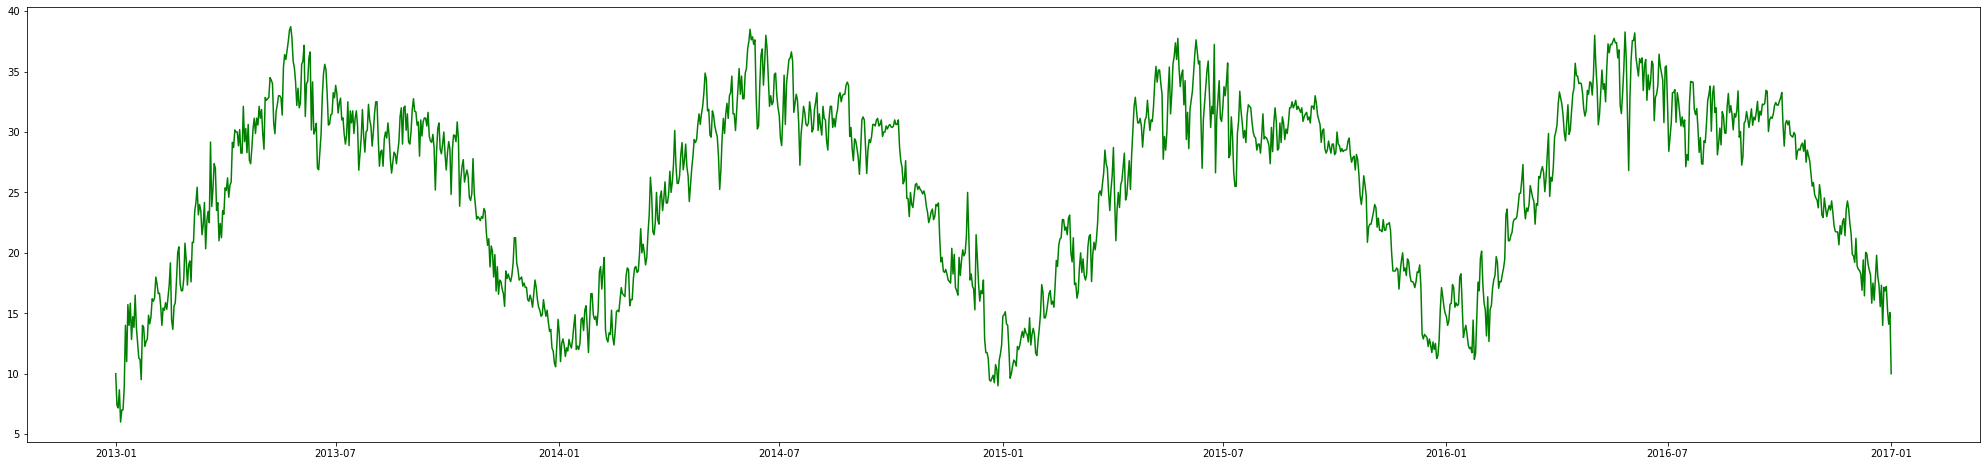

In [22]:
plt.figure(figsize=(35, 8))
plt.plot(ts_data['meantemp'],color="green")

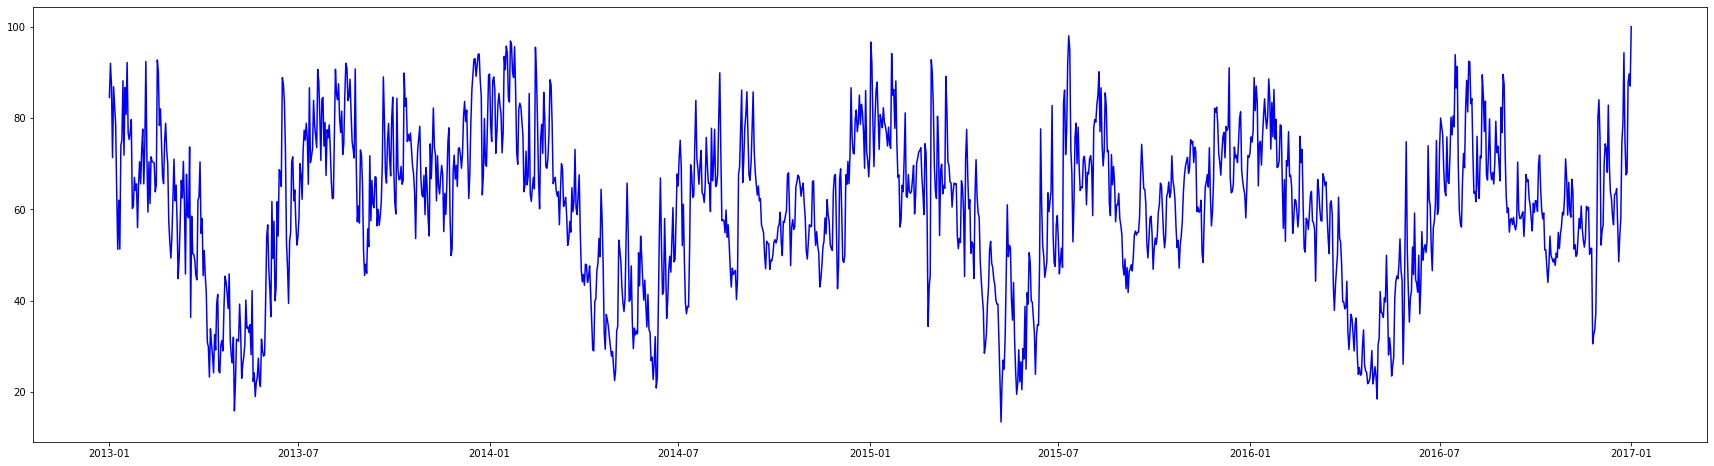

In [26]:
plt.figure(figsize=(30, 8))
plt.plot(ts_data['humidity'],color="blue")

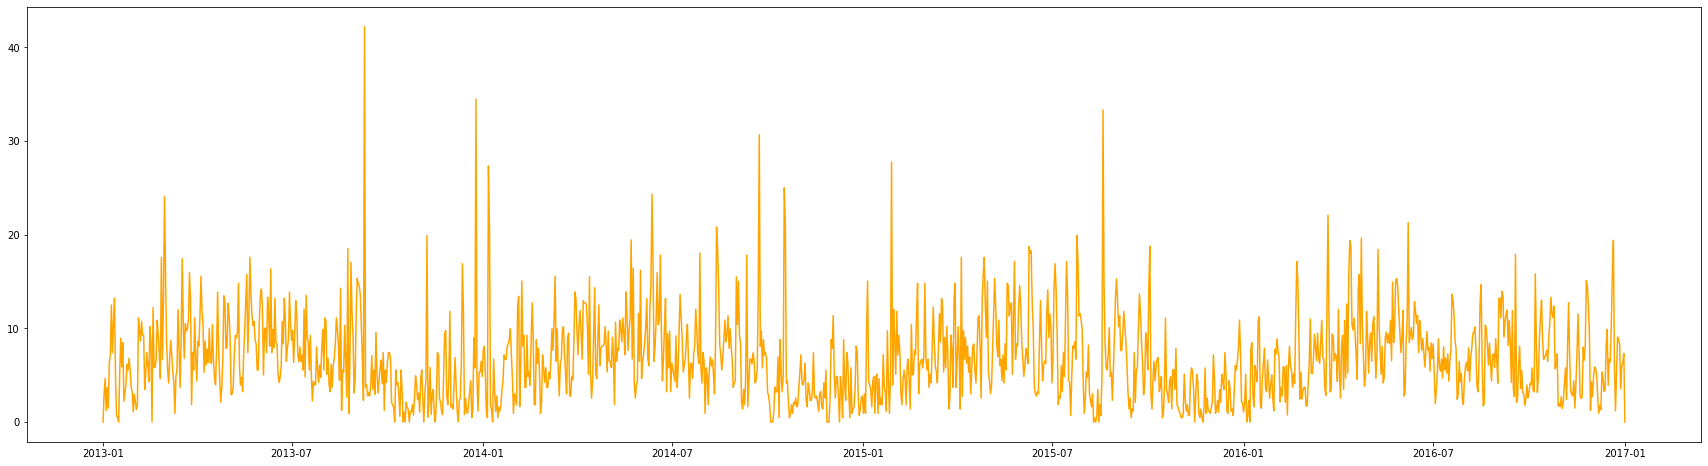

In [98]:
plt.figure(figsize=(30, 8))
plt.plot(ts_data['wind_speed'],color="orange")

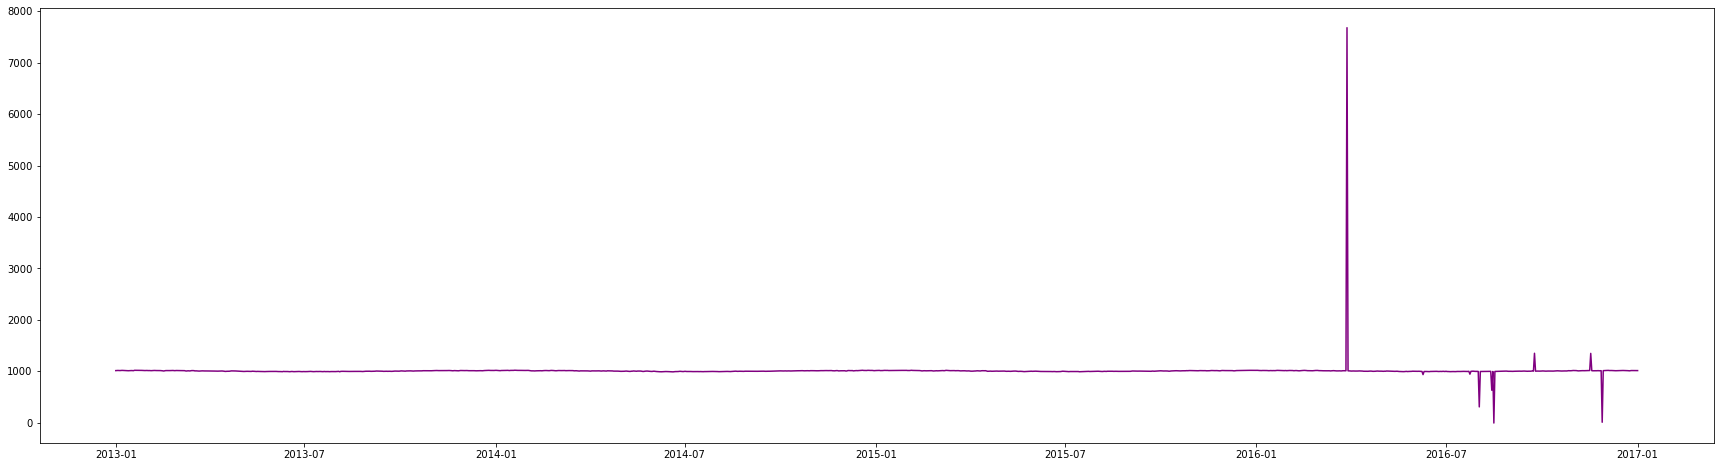

In [99]:
plt.figure(figsize=(30, 8))
plt.plot(ts_data['meanpressure'],color="purple")

meanpressure seems to contain outliers

In [106]:
def remove_outlier(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    l  = q1-1.5*iqr
    h = q3+1.5*iqr
    df = data.loc[(data[col] > l) & (data[col] < h)]
    return df

In [109]:
ts_data = remove_outlier(ts_data,'meanpressure')

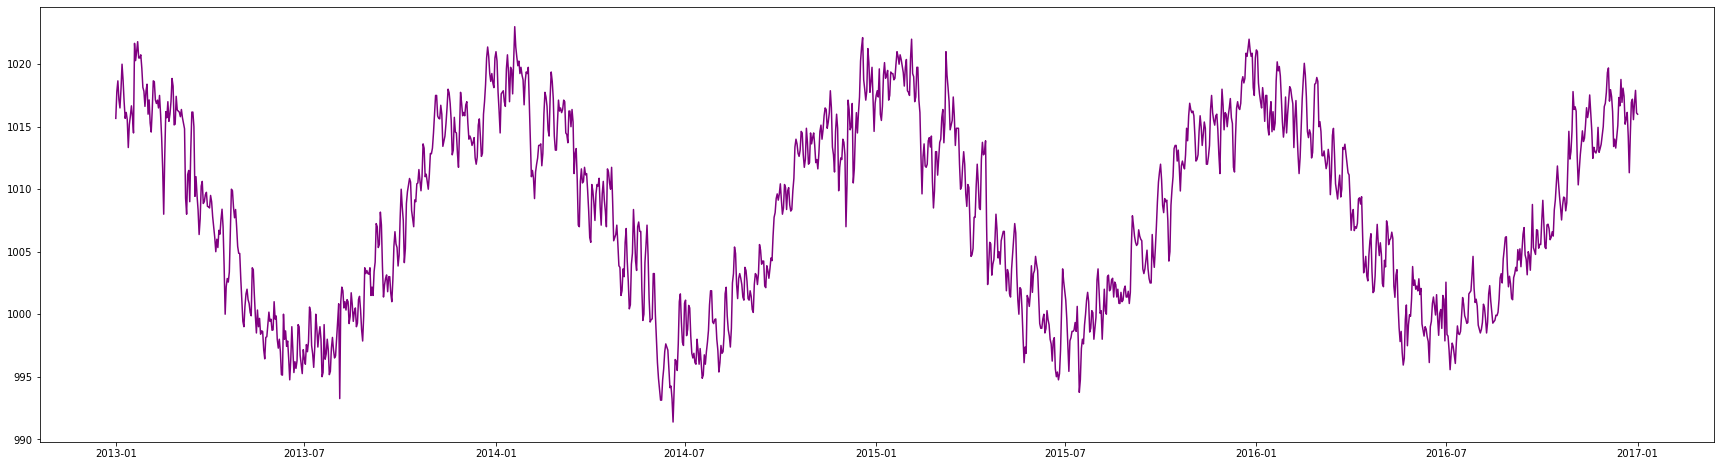

In [110]:
plt.figure(figsize=(30, 8))
plt.plot(ts_data['meanpressure'],color="purple")

In [111]:
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

<AxesSubplot:xlabel='date'>

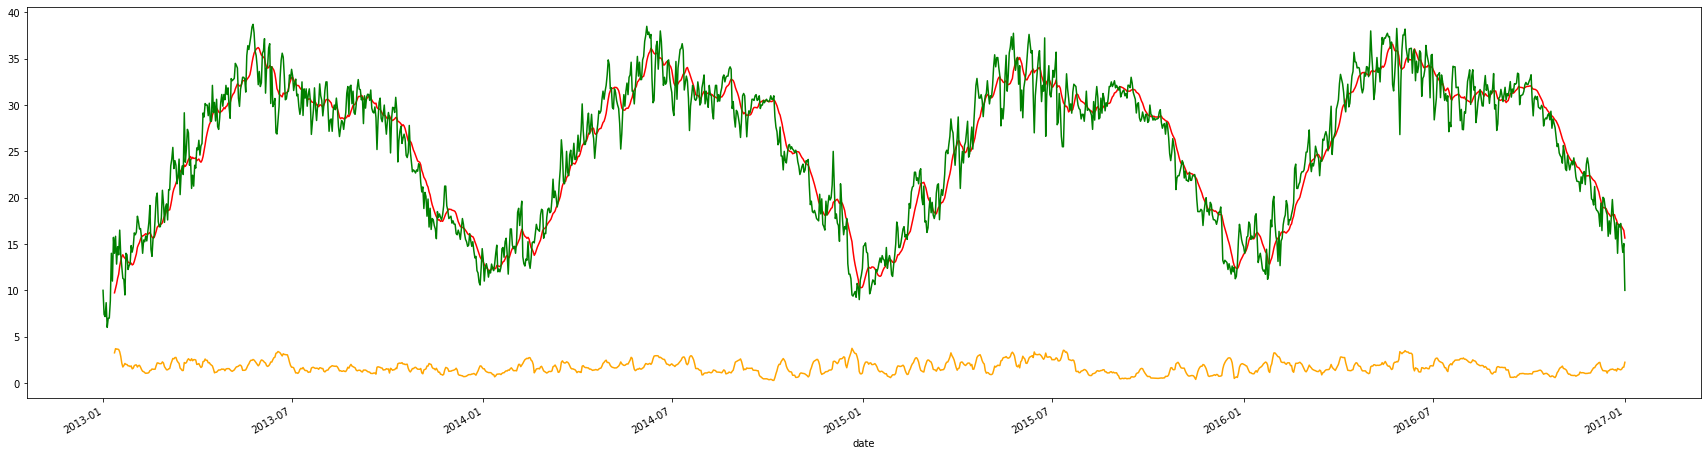

In [119]:
plt.figure(figsize=(30, 8))
rol_mean['meantemp'].plot(color="red")
ts_data['meantemp'].plot(color="green")
rol_std['meantemp'].plot(color="orange")

In [121]:
for i in ts_data:
    print(i," p:",(adfuller(ts_data[i]))[1])

meantemp  p: 0.2820863747671893
humidity  p: 0.004233462189280523
wind_speed  p: 0.0024702802613419277
meanpressure  p: 0.23062267971510347


data does not require any shift

meantemp


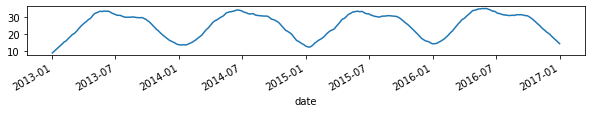

humidity


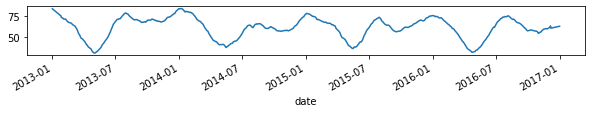

wind_speed


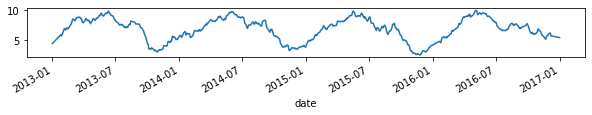

meanpressure


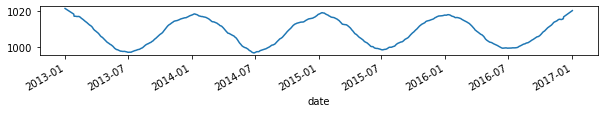

In [182]:
for i in ts_data:
    plt.figure(figsize=(10, 1))
    res = seasonal_decompose(ts_data[i], period=52, model='additive', extrapolate_trend='freq')
    res.trend.plot(legend=False)
    print(i)
    plt.show()

# univariate arima

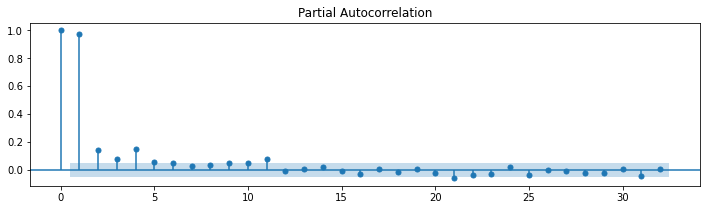

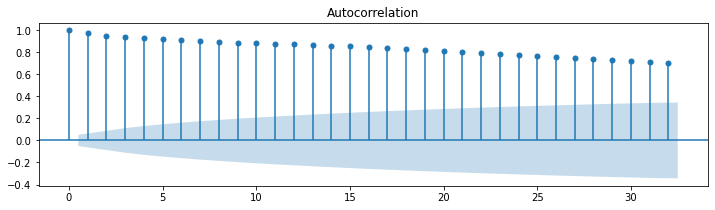

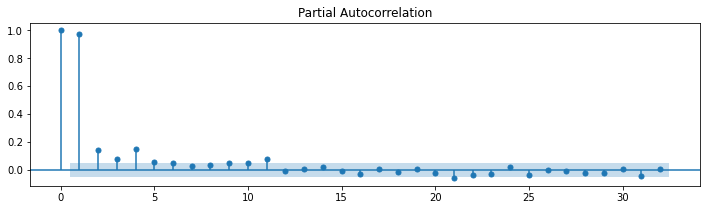

In [181]:
mt = ts_data["meantemp"]
fig, ax = plt.subplots(figsize=(12, 3))
plot_acf(mt, ax=ax)
fig, ax = plt.subplots(figsize=(12, 3))
plot_pacf(mt, ax=ax)

In [228]:
model = ARIMA(mt, seasonal_order=(2,2,1,12))
model_fit = model.fit()

C:\Users\JAYANKONDAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\JAYANKONDAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\JAYANKONDAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


C:\Users\JAYANKONDAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

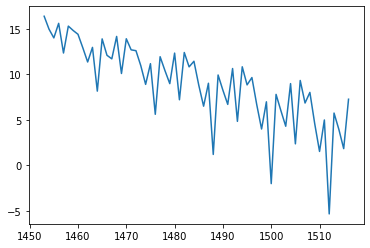

In [229]:
res = model_fit.forecast(64)
res.plot()